# Verarbeitung von Timelapse-Daten
Dieses Notebook demonstriert, wie man Timelapse-Daten Frame für Frame verarbeitet.

In [1]:
from skimage.io import imread, imsave
import pyclesperanto_prototype as cle
import numpy as np

Zunächst sollten wir den Ursprung der Daten, die wir verarbeiten möchten, und den Ort, an dem die Ergebnisse gespeichert werden sollen, definieren.

In [2]:
input_file = "../../data/CalibZAPWfixed_000154_max.tif"
output_file = "../../data/CalibZAPWfixed_000154_max_labels.tif"

Als Nächstes öffnen wir den Datensatz und sehen uns an, welche Bilddimensionen er hat.

In [3]:
timelapse = imread(input_file)
timelapse.shape

(100, 235, 389)

Wenn nicht offensichtlich ist, welche Dimension die Zeitdimension ist, empfiehlt es sich, den Datensatz in verschiedene Richtungen zu schneiden.

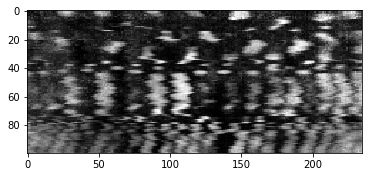

In [4]:
cle.imshow(timelapse[:,:,150])

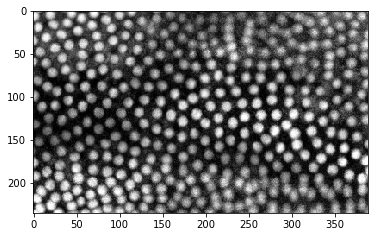

In [5]:
cle.imshow(timelapse[50,:,:])

Offensichtlich ist die Zeitdimension die erste Dimension (Index 0).

Als Nächstes definieren wir den Bildverarbeitungsablauf, den wir auf unseren Datensatz anwenden möchten. Es empfiehlt sich, dies in einer Funktion zu tun, damit wir sie später ohne Kopieren und Einfügen wiederverwenden können.

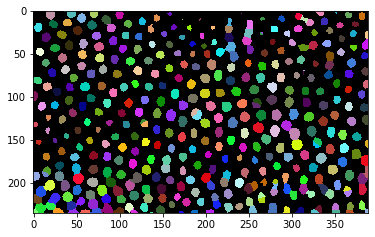

In [6]:
def process_image(image, 
                  # define default parameters for the procedure
                  background_subtraction_radius=10, 
                  spot_sigma=1, 
                  outline_sigma=1):
    """Segment nuclei in an image and return labels"""
    # pre-process image
    background_subtracted = cle.top_hat_box(image, 
                  radius_x=background_subtraction_radius, 
                  radius_y=background_subtraction_radius)
    
    # segment nuclei
    labels = cle.voronoi_otsu_labeling(background_subtracted,
                  spot_sigma=spot_sigma,
                  outline_sigma=outline_sigma)

    return labels

# Try out the function
single_timepoint = timelapse[50]
segmented = process_image(single_timepoint)

# Visualize result
cle.imshow(segmented, labels=True)

Nachdem wir diese Funktion für einen einzelnen Zeitpunkt zum Laufen gebracht haben, sollten wir eine for-Schleife programmieren, die durch den Timelapse geht, das Verfahren auf einige Bilder anwendet und die Ergebnisse visualisiert. Hinweis: Wir gehen in Schritten von 10 Bildern durch den Timelapse, um einen Überblick zu bekommen.

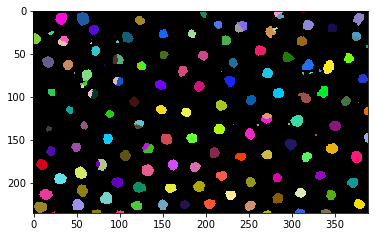

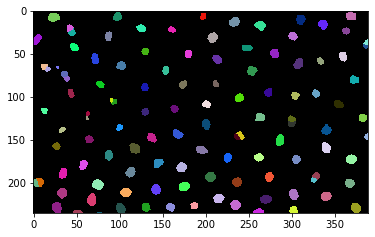

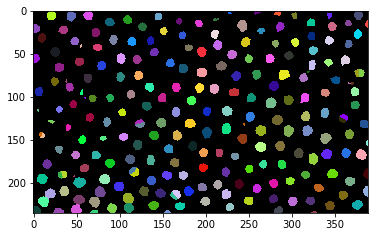

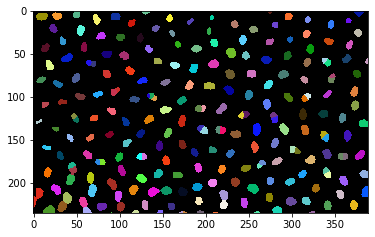

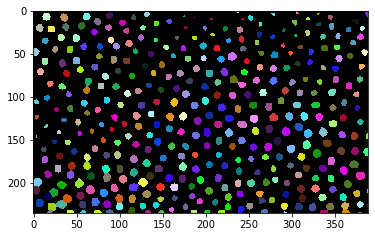

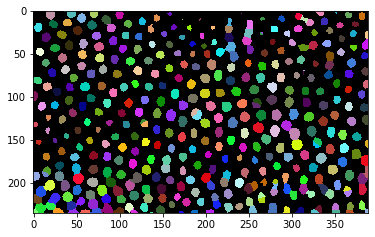

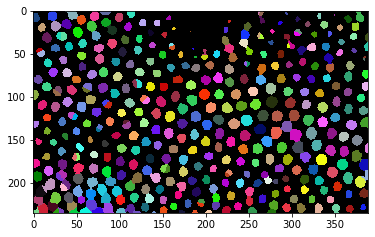

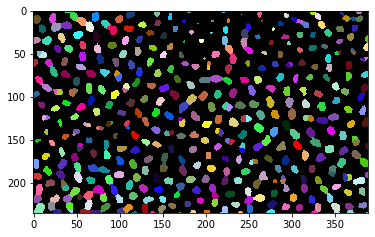

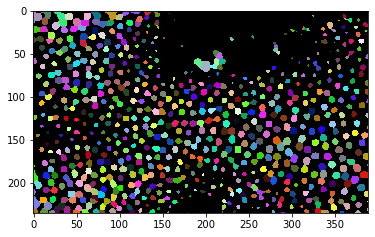

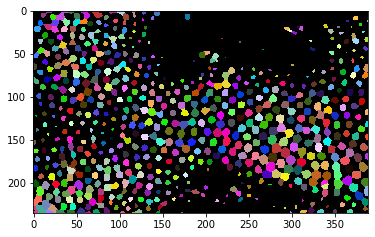

In [7]:
max_t = timelapse.shape[0]
for t in range(0, max_t, 10):
    label_image = process_image(timelapse[t])
    cle.imshow(label_image, labels=True)

Wenn wir überzeugt sind, dass das Verfahren funktioniert, können wir es auf den gesamten Timelapse anwenden, die Ergebnisse in einer Liste sammeln und als Stack auf der Festplatte speichern.

In [8]:
label_timelapse = []
for t in range(0, max_t):
    label_image = process_image(timelapse[t])
    label_timelapse.append(label_image)
    
# convert list of 2D images to 3D stack
np_stack = np.asarray(label_timelapse)

# save result to disk
imsave(output_file, np_stack)

C:\Users\rober\AppData\Local\Temp\ipykernel_27924\219181406.py:10: UserWarning: ../../data/CalibZAPWfixed_000154_max_labels.tif is a low contrast image
  imsave(output_file, np_stack)


Um sicherzugehen, dass alles gut funktioniert hat, öffnen wir den Datensatz erneut und geben seine Dimensionalität aus. Sie sollte identisch mit dem ursprünglichen `timelapse`-Datensatz sein.

In [9]:
result = imread(output_file)

result.shape

(100, 235, 389)

In [10]:
timelapse.shape

(100, 235, 389)